In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# the scaler - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Carga del dataset

In [3]:
dataTraining = pd.read_csv("Training Data.csv")
dataTraining.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# encontrar las variables con datos faltantes
vars_with_na = [var for var in dataTraining.columns if dataTraining[var].isnull().mean() > 0]
vars_with_na

[]

Ninguna variable tiene datos faltantes, en otras palabra el dataset esta completo.

## Hallar X, Y

In [5]:
feature_cols = ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_JOB_YRS', 'Risk_Flag']
X = dataTraining[feature_cols] # features
y = dataTraining.Risk_Flag # target

In [6]:
X.dtypes

Income              int64
Age                 int64
Experience          int64
Married/Single     object
House_Ownership    object
Car_Ownership      object
CURRENT_JOB_YRS     int64
Risk_Flag           int64
dtype: object

## Dividir el dataset en training and testing 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Cambianos los yes, no por 1 y 0
X_train['Car_Ownership'].replace(['no','yes'],[0,1],inplace=True)
X_test['Car_Ownership'].replace(['no','yes'],[0,1],inplace=True)
# Cambianos los single, married por 1 y 0
X_train['Married/Single'].replace(['single','married'],[0,1],inplace=True)
X_test['Married/Single'].replace(['single','married'],[0,1],inplace=True)
# Cambianos los owned, rented, norent_noown por 0,1 y 2
X_train['House_Ownership'].replace(['owned','rented', 'norent_noown'],[0,1,2],inplace=True)
X_test['House_Ownership'].replace(['owned','rented', 'norent_noown'],[0,1,2],inplace=True)

X_train


D:\Windows.old\Programas\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,Risk_Flag
184312,8976828,58,10,0,1,1,10,0
52355,6591039,72,15,0,1,1,3,0
57516,4913009,65,20,0,1,1,4,0
140257,5861916,48,11,0,1,0,11,1
31182,6133734,25,17,0,1,0,4,0
...,...,...,...,...,...,...,...,...
229119,7333534,62,15,0,1,0,7,0
5192,2214555,45,4,0,1,0,4,0
208780,4346432,32,17,0,1,0,11,0
229611,6037363,41,5,0,1,0,5,0


In [19]:
X_train.dtypes

Income             int64
Age                int64
Experience         int64
Married/Single     int64
House_Ownership    int64
Car_Ownership      int64
CURRENT_JOB_YRS    int64
Risk_Flag          int64
dtype: object

## Normalización media con Scikit-learn: solución alternativa

In [21]:

# configurar el StandardScaler para que elimine la media
# pero que no divida por la desviación estándar
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# configurar el robustscaler para que NO elimine la mediana
# sino que normalice por max()-min(), es importante para esto configurar el
# rango de cuantiles a 0 y 100, que representan los valores mínimo y máximo
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# ajustar los escaladores al conjunto de train, aprenderá los parámetros
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))


In [22]:

# transformemos los arrays NumPy devueltos en dataframes para el resto de la demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
#Descripción de los datos antes de la Normalización 
np.round(X_train.describe(), 1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,Risk_Flag
count,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0
mean,4998092.8,50.0,10.1,0.1,1.0,0.3,6.3,0.1
std,2878409.0,17.1,6.0,0.3,0.3,0.5,3.6,0.3
min,10310.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2504515.0,35.0,5.0,0.0,1.0,0.0,3.0,0.0
50%,5001124.0,50.0,10.0,0.0,1.0,0.0,6.0,0.0
75%,7479878.0,65.0,15.0,0.0,1.0,1.0,9.0,0.0
max,9999938.0,79.0,20.0,1.0,2.0,1.0,14.0,1.0


In [24]:
#Descripción de los datos despues de la Normalización
np.round(X_train_scaled.describe(), 1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,Risk_Flag
count,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0,176400.0
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,0.3,0.3,0.3,0.3,0.1,0.5,0.3,0.3
min,-0.5,-0.5,-0.5,-0.1,-0.5,-0.3,-0.5,-0.1
25%,-0.2,-0.3,-0.3,-0.1,0.0,-0.3,-0.2,-0.1
50%,0.0,0.0,-0.0,-0.1,0.0,-0.3,-0.0,-0.1
75%,0.2,0.3,0.2,-0.1,0.0,0.7,0.2,-0.1
max,0.5,0.5,0.5,0.9,0.5,0.7,0.5,0.9


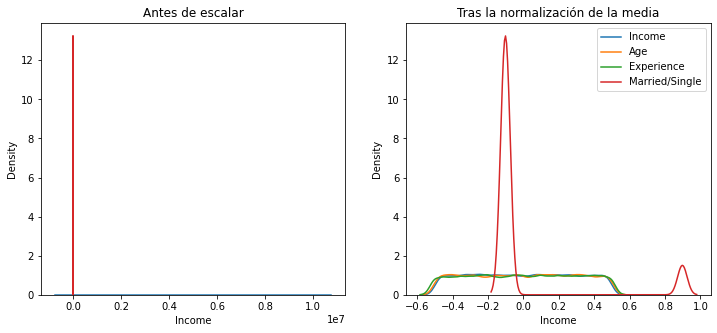

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Antes de escalar')
sns.kdeplot(X_train['Income'], ax=ax1)
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Experience'], ax=ax1)
sns.kdeplot(X_train['Married/Single'], ax=ax1)
# after scaling
ax2.set_title('Tras la normalización de la media')
sns.kdeplot(X_train_scaled['Income'], ax=ax2)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Experience'], ax=ax2)
sns.kdeplot(X_train_scaled['Married/Single'], ax=ax2)

plt.legend(labels=["Income", "Age", "Experience", "Married/Single"])
plt.show()

## Selección de características.

In [33]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,1.0
Test Accuracy,1.0
Top 1 Feature Predictor,Risk_Flag
Top 2 Feature Predictor,Income
Top 3 Feature Predictor,Age
Top 4 Feature Predictor,Experience
Top 5 Feature Predictor,CURRENT_JOB_YRS
